In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
credit = pd.io.parsers.read_csv("NewdefaultValues.csv")
del credit['Unnamed: 0']
credit.loc[credit['SEX'] == 1,'SEX'] = 'Male'
credit.loc[credit['SEX'] == 2,'SEX'] = 'Female'
credit.loc[credit['defaultPayment_Nextmonth'] == 1,'defaultPayment_Nextmonth'] = 'Default'
credit.loc[credit['defaultPayment_Nextmonth'] == 0,'defaultPayment_Nextmonth'] = 'NotDefault'

credit.loc[credit['MARRIAGE'] == 0,'MARRIAGE'] = 'Others'
credit.loc[credit['MARRIAGE'] == 1,'MARRIAGE'] = 'Married'
credit.loc[credit['MARRIAGE'] == 2,'MARRIAGE'] = 'Single'
credit.loc[credit['MARRIAGE'] == 3,'MARRIAGE'] = 'Divorce'

credit.loc[credit['EDUCATION'] == 0,'EDUCATION'] = 'Others'
credit.loc[credit['EDUCATION'] == 1,'EDUCATION'] = 'Graduate School'
credit.loc[credit['EDUCATION'] == 2,'EDUCATION'] = 'University'
credit.loc[credit['EDUCATION'] == 3,'EDUCATION'] = 'High School'
credit.loc[credit['EDUCATION'] == 4,'EDUCATION'] = 'Others'
credit.loc[credit['EDUCATION'] == 5,'EDUCATION'] = 'Others'

credit.loc[credit['EDUCATION'] == 6,'EDUCATION'] = 'Others'

In [2]:
def Age_Splitting(passenger):
    AGE, SEX = passenger
    
    if (AGE > 16 and AGE < 30):
        return 'Young Adult'
    if AGE > 30 and AGE < 55:
        return 'Adult'
    else:
        return 'Old'

In [3]:
credit['AGEGROUP'] = credit[['AGE', 'SEX']].apply(Age_Splitting, axis=1)

12.5%
47.8%
9.6%
30.1%


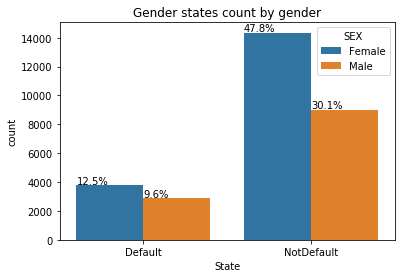

In [48]:
# Define which gender has better payments on credits 
import matplotlib.pyplot as plt
fg = sns.countplot("defaultPayment_Nextmonth", hue='SEX', data=credit);
plt.title("Gender states count by gender")
plt.xlabel('State')
total = len(credit["AGE"])
for p in fg.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        print(percentage)
        x = p.get_x()
        y = p.get_y() + p.get_height()+111
        fg.annotate(percentage, (x, y))

plt.show()

61.4%
38.6%


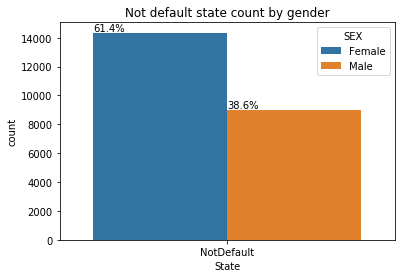

In [49]:
# Define which gender has better payments on credits 
import matplotlib.pyplot as plt
classifier = credit['defaultPayment_Nextmonth']=="NotDefault"
newCredit = credit[classifier]
fg = sns.countplot("defaultPayment_Nextmonth", hue='SEX', data=newCredit);
plt.title("Not default state count by gender")
plt.xlabel('State')
total = len(newCredit["AGE"])
for p in fg.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        print(percentage)
        x = p.get_x()
        y = p.get_y() + p.get_height()+111
        fg.annotate(percentage, (x, y))

plt.show()

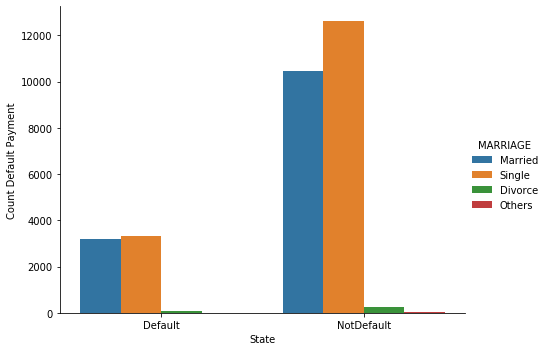

In [5]:
# Define which Marital status has better payments on credits 
fg = sns.catplot("defaultPayment_Nextmonth", hue='MARRIAGE', kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('State')
fg.set_ylabels('Count Default Payment')

14.3%
45.8%
8.7%
36.6%
5.3%
15.8%
0.1%
1.9%


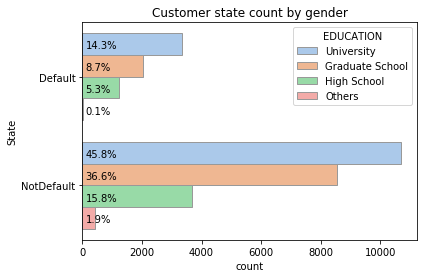

In [83]:
# Define which Education has better payments on credits 
fg = sns.countplot(y="defaultPayment_Nextmonth", hue="EDUCATION",
            palette="pastel", edgecolor=".6",
            data=credit);
plt.title("Customer state count by gender")
plt.ylabel('State')
total = len(newCredit["AGE"])
for p in fg.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        print(percentage)
        x = p.get_x() + 111
        y = p.get_y()-0.06 + p.get_height()
        fg.annotate(percentage, (x, y))

plt.show()

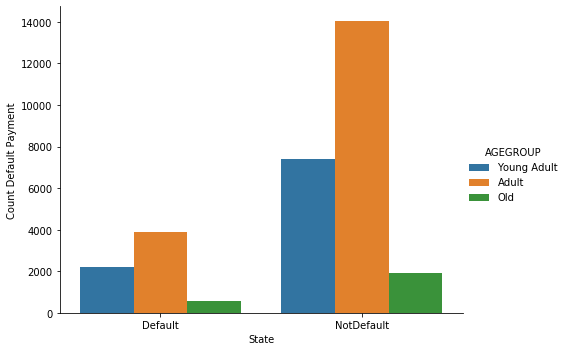

In [7]:
# Define which Age group has better payments on credits 
fg = sns.catplot("defaultPayment_Nextmonth", hue='AGEGROUP', kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('State')
fg.set_ylabels('Count Default Payment')

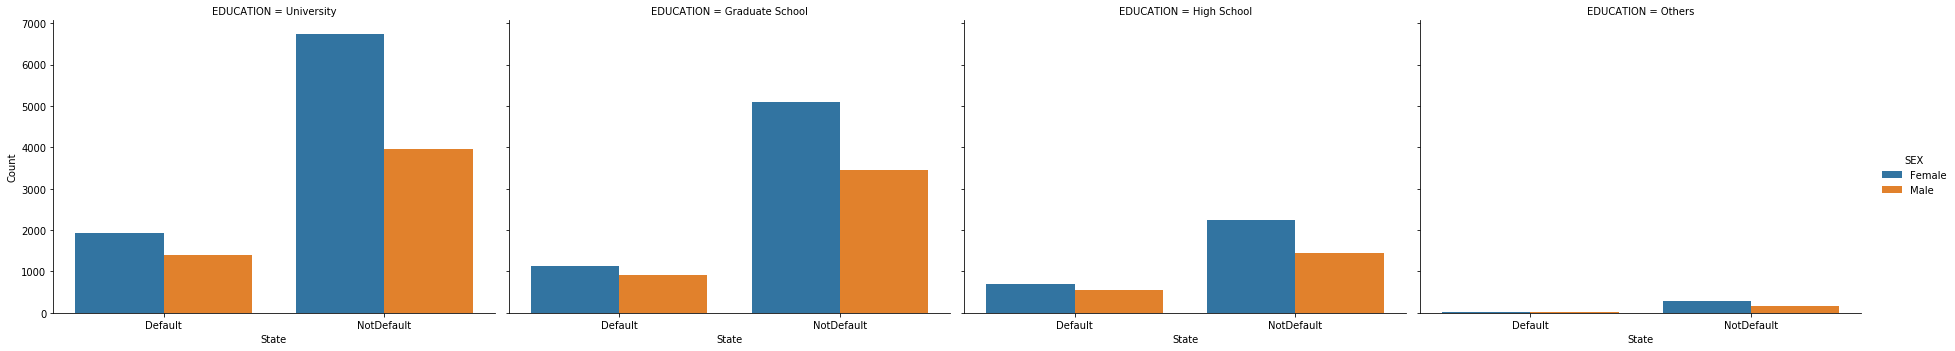

In [85]:
# Define which gender with certaing education has better payments on credits 
fg = sns.catplot(x="defaultPayment_Nextmonth",hue="SEX", col="EDUCATION" , kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('State')
fg.set_ylabels('Count')


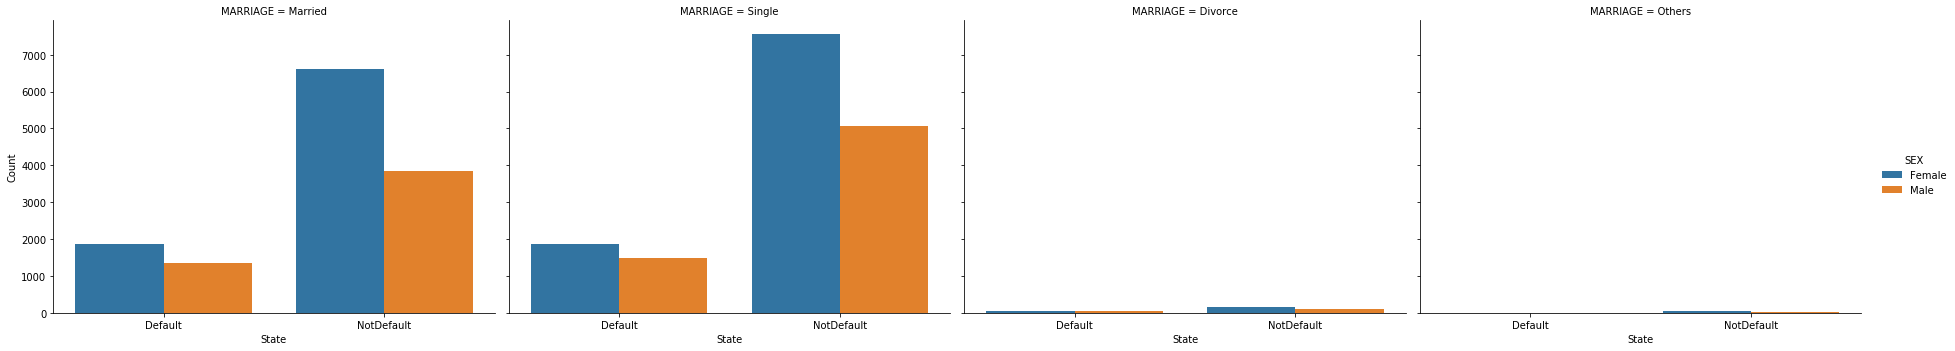

In [9]:
# Define which gender with certaing marital status has better payments on credits 
fg = sns.catplot(x="defaultPayment_Nextmonth",hue="SEX", col="MARRIAGE" , kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('State')
fg.set_ylabels('Count')


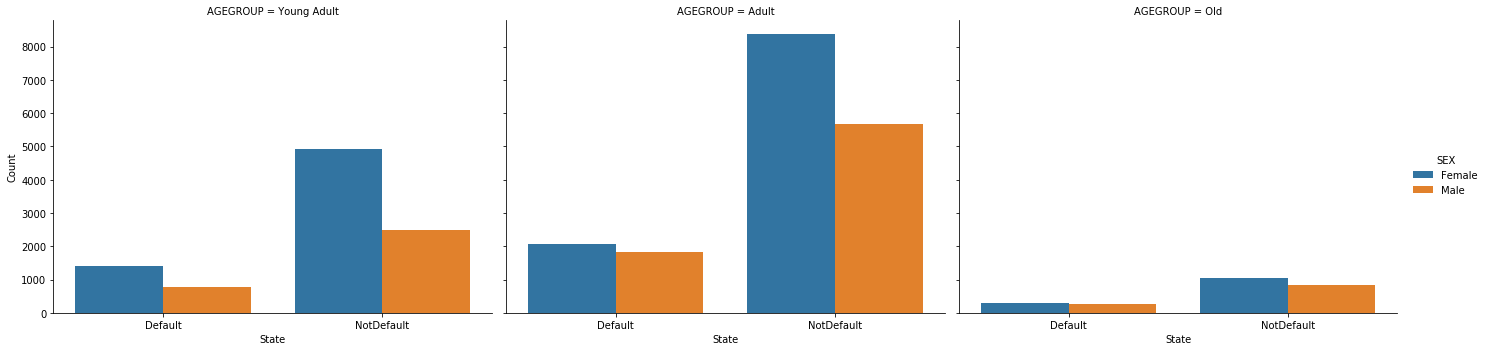

In [10]:
# Define which gender with certaing age has better payments on credits 
fg = sns.catplot(x="defaultPayment_Nextmonth",hue="SEX", col="AGEGROUP" , kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('State')
fg.set_ylabels('Count')